In [1]:
import pickle
import pandas as pd
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#reading the two datasets for diabetes
dd=pd.read_csv("diabetes.csv")

Text(0,0.5,'number')

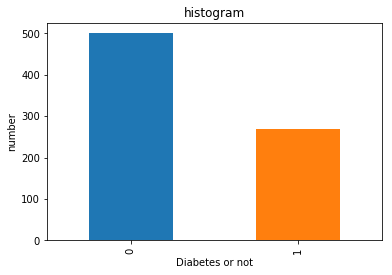

In [3]:
num = pd.value_counts(dd['Outcome'],sort=True).sort_index()
num.plot(kind='bar')
plt.title('histogram')
plt.xlabel('Diabetes or not')
plt.ylabel('number')

In [4]:
dd.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

In [5]:
#featuire selection for diabetes
ddi=dd.iloc[:,1:-1]
ddo=dd.iloc[:,-1]

In [6]:
#thus heat module contains null values
from sklearn.preprocessing import Imputer
im=Imputer(missing_values="NaN",strategy="mean",axis=0)
ddi["Glucose"]=im.fit_transform(ddi[["Glucose"]])
ddi["BloodPressure"]=im.fit_transform(ddi[["BloodPressure"]])
ddi["SkinThickness"]=im.fit_transform(ddi[["SkinThickness"]])
ddi["Insulin"]=im.fit_transform(ddi[["Insulin"]])
ddi["BMI"]=im.fit_transform(ddi[["BMI"]])
ddi["DiabetesPedigreeFunction"]=im.fit_transform(ddi[["DiabetesPedigreeFunction"]])
ddi["Age"]=im.fit_transform(ddi[["Age"]])

In [7]:
ddi.isnull().sum()
ddo.isnull().sum()

0

In [8]:
#for diabetes dieases training set
from sklearn.model_selection import train_test_split

x1_train,x1_test,y1_train,y1_test=train_test_split(ddi,ddo,test_size=0.2)


0.7467532467532467


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([0.24675325, 0.34675325, 0.44675325, 0.54675325, 0.64675325,
        0.74675325, 0.84675325, 0.94675325, 1.04675325, 1.14675325,
        1.24675325]),
 <a list of 10 Patch objects>)

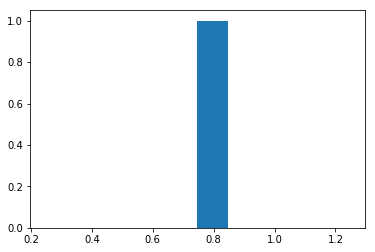

In [9]:
#for diabets

from sklearn.linear_model import LogisticRegression
lg1=LogisticRegression()
lg1.fit(x1_train,y1_train)
lg1.predict(x1_test)
d=lg1.score(x1_test,y1_test)
print(d)

import matplotlib.pyplot as plt
plt.hist(d)





0.6558441558441559


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([0.15584416, 0.25584416, 0.35584416, 0.45584416, 0.55584416,
        0.65584416, 0.75584416, 0.85584416, 0.95584416, 1.05584416,
        1.15584416]),
 <a list of 10 Patch objects>)

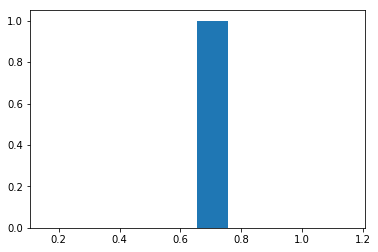

In [10]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x1_train, y1_train)
dt.predict(x1_test)
d=dt.score( x1_test,y1_test)
print(d)
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(d)

0.7727272727272727
Using matplotlib backend: Qt5Agg


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([0.27272727, 0.37272727, 0.47272727, 0.57272727, 0.67272727,
        0.77272727, 0.87272727, 0.97272727, 1.07272727, 1.17272727,
        1.27272727]),
 <a list of 10 Patch objects>)

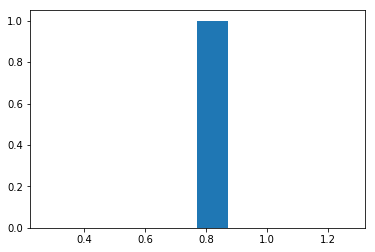

In [11]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

nb.fit(x1_train, y1_train)
nb.predict(x1_test)
l=nb.score( x1_test,y1_test)
print(l)

import matplotlib.pyplot as plt
%matplotlib
plt.hist(l)

C:\Users\Dani\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.7597402597402597


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([0.25974026, 0.35974026, 0.45974026, 0.55974026, 0.65974026,
        0.75974026, 0.85974026, 0.95974026, 1.05974026, 1.15974026,
        1.25974026]),
 <a list of 10 Patch objects>)

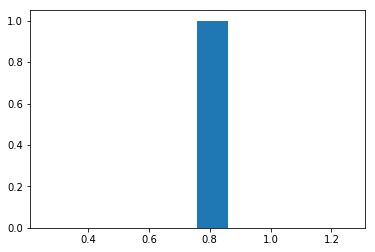

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50)
rf.fit(x1_train, y1_train)
rf.predict(x1_test)
r=rf.score( x1_test,y1_test)
print(r)
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(r)

0.6558441558441559


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([0.15584416, 0.25584416, 0.35584416, 0.45584416, 0.55584416,
        0.65584416, 0.75584416, 0.85584416, 0.95584416, 1.05584416,
        1.15584416]),
 <a list of 10 Patch objects>)

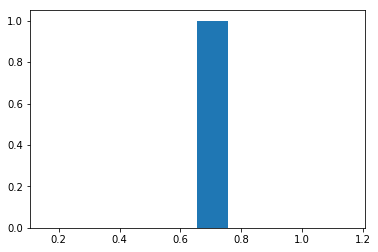

In [17]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(x1_train, y1_train)
sv.predict(x1_test)
s=sv.score( x1_test,y1_test)
print(s)
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(s)

In [15]:
with open("diabetes.pickle","wb") as g:
    pickle.dump(lg1,g,protocol=2)